In [1]:
%run ../src/__init__.py

In [2]:
%run ../src/load_data.py

/home/jovyan/dsi/Capstone/src/load_data.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['attendance'][x] = data.iloc[x + 1]['attendance']
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/g

In [3]:
cards_df = final_drop[final_drop['team']=='STL'].sort_values('date',axis=0)

In [4]:
cards_df =  team_data_clean(cards_df)

/home/jovyan/dsi/Capstone/src/__init__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [5]:
cards_df = add_rival('STL', cards_df)

In [6]:
new_data=pd.read_pickle('../data/test_data_mlb.pkl')

In [7]:
cards_new = new_data[new_data['team'] == 'MIL'].sort_values('date',axis=0)

In [8]:
cards_new =  test_data_clean(cards_new)

/home/jovyan/dsi/Capstone/src/__init__.py:56: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [9]:
cards_new = add_rival('STL', cards_new)

In [10]:
cards_data = pd.concat([cards_df, cards_new],axis=0)

In [11]:
cards_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 54879 to 1295
Data columns (total 70 columns):
attendance         2240 non-null int64
date               2240 non-null datetime64[ns]
div_rank           2240 non-null int64
double_header      2240 non-null float64
gb                 2240 non-null float64
opening_day        2240 non-null float64
opponent           2240 non-null object
record             2240 non-null float64
runs_allowed_ma    2240 non-null float64
runs_ma            2240 non-null float64
runs_pg            2240 non-null float64
streak             2240 non-null int64
team               2240 non-null object
1990               2240 non-null int64
1991               2240 non-null int64
1992               2240 non-null int64
1993               2240 non-null int64
1994               2240 non-null int64
1995               2240 non-null int64
1996               2240 non-null int64
1997               2240 non-null int64
1998               2240 non-null int64
1999  

,count,mean,std,min,25%,50%,75%,max,skew
runs,2240.0,4.635268,3.042135,0.0,2.000000,4.000000,6.000000,18.0,0.860723
runs_allowed,2240.0,4.128571,2.983876,0.0,2.000000,4.000000,6.000000,20.0,1.065072
innings,2240.0,9.203571,0.921960,0.0,9.000000,9.000000,9.000000,20.0,3.790103
record,2240.0,0.534699,0.098276,0.0,0.500000,0.533333,0.576271,1.0,-1.421126
div_rank,2240.0,2.318304,1.319123,0.0,1.000000,2.000000,3.000000,6.0,0.901164
gb,2240.0,-2.802902,6.924164,-25.5,-7.000000,-2.000000,1.000000,17.0,-0.298629
time,2240.0,174.549107,28.896147,0.0,156.000000,171.000000,188.000000,413.0,1.426246
attendance,2240.0,37849.931696,7698.483547,10289.0,32764.500000,40091.500000,43786.750000,53415.0,-0.770314
runs_pg,2240.0,4.674108,0.867057,0.0,4.242089,4.693998,5.043478,11.0,-0.132917
runs_ma,2240.0,4.641696,1.376679,1.4,3.600000,4.600000,5.600000,9.8,0.443092


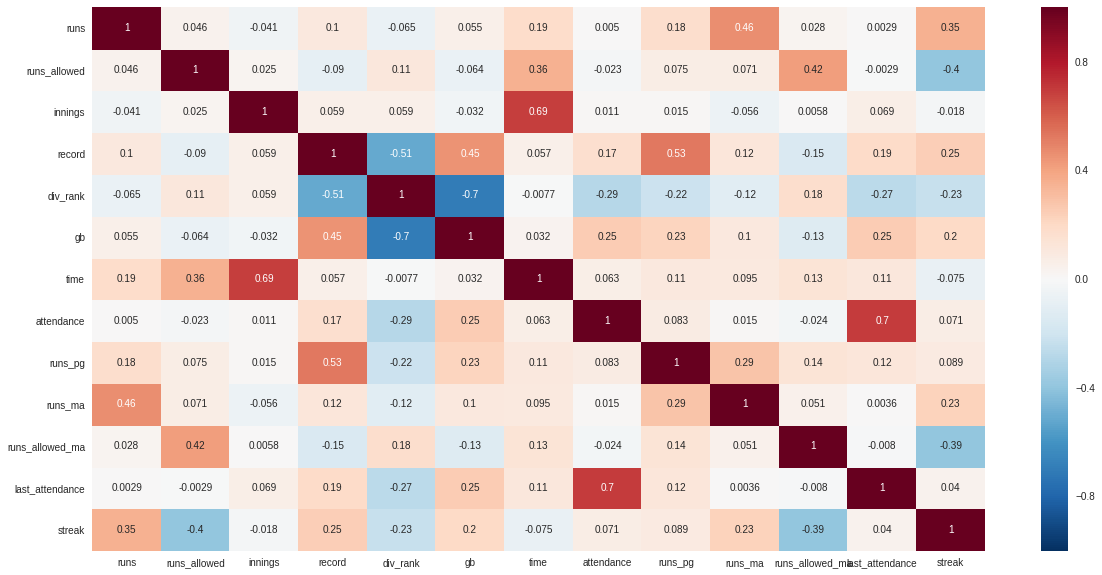

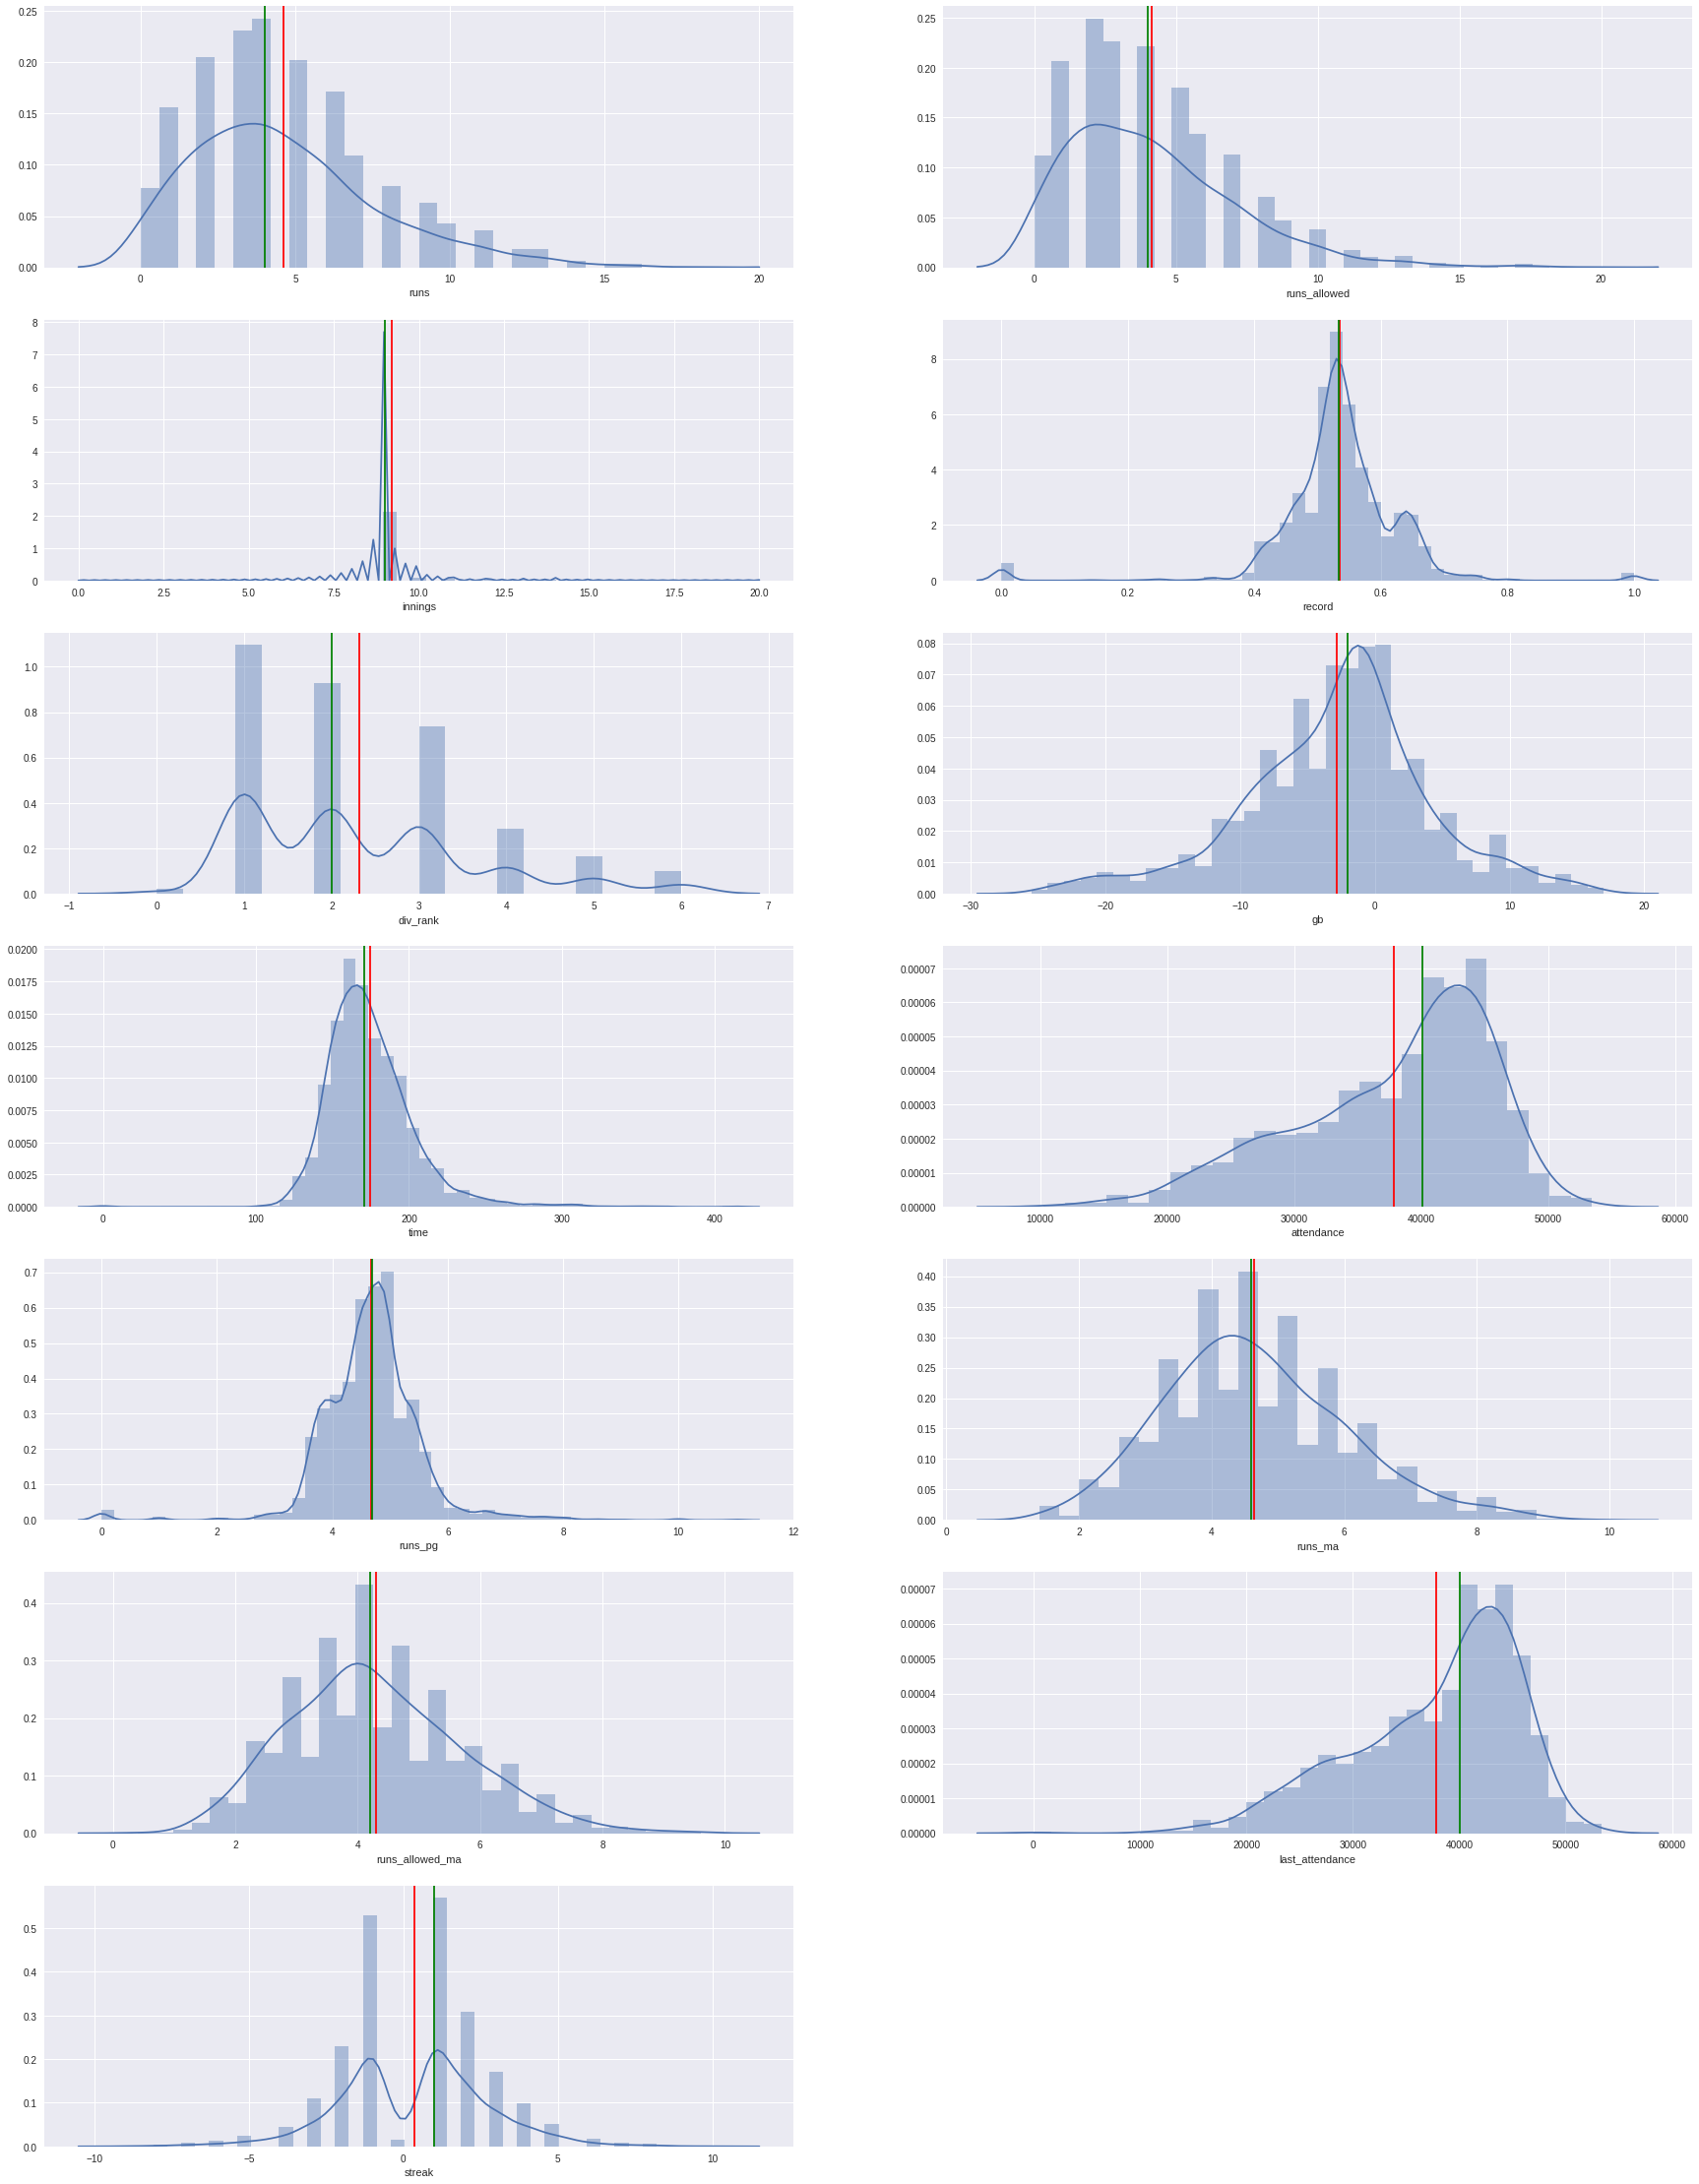

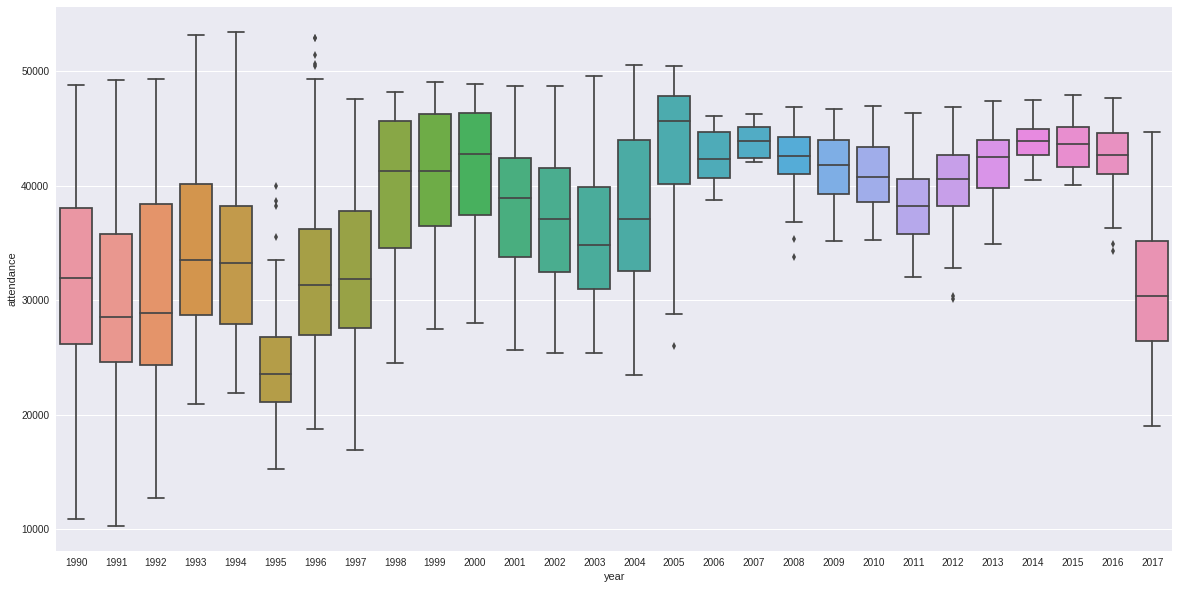

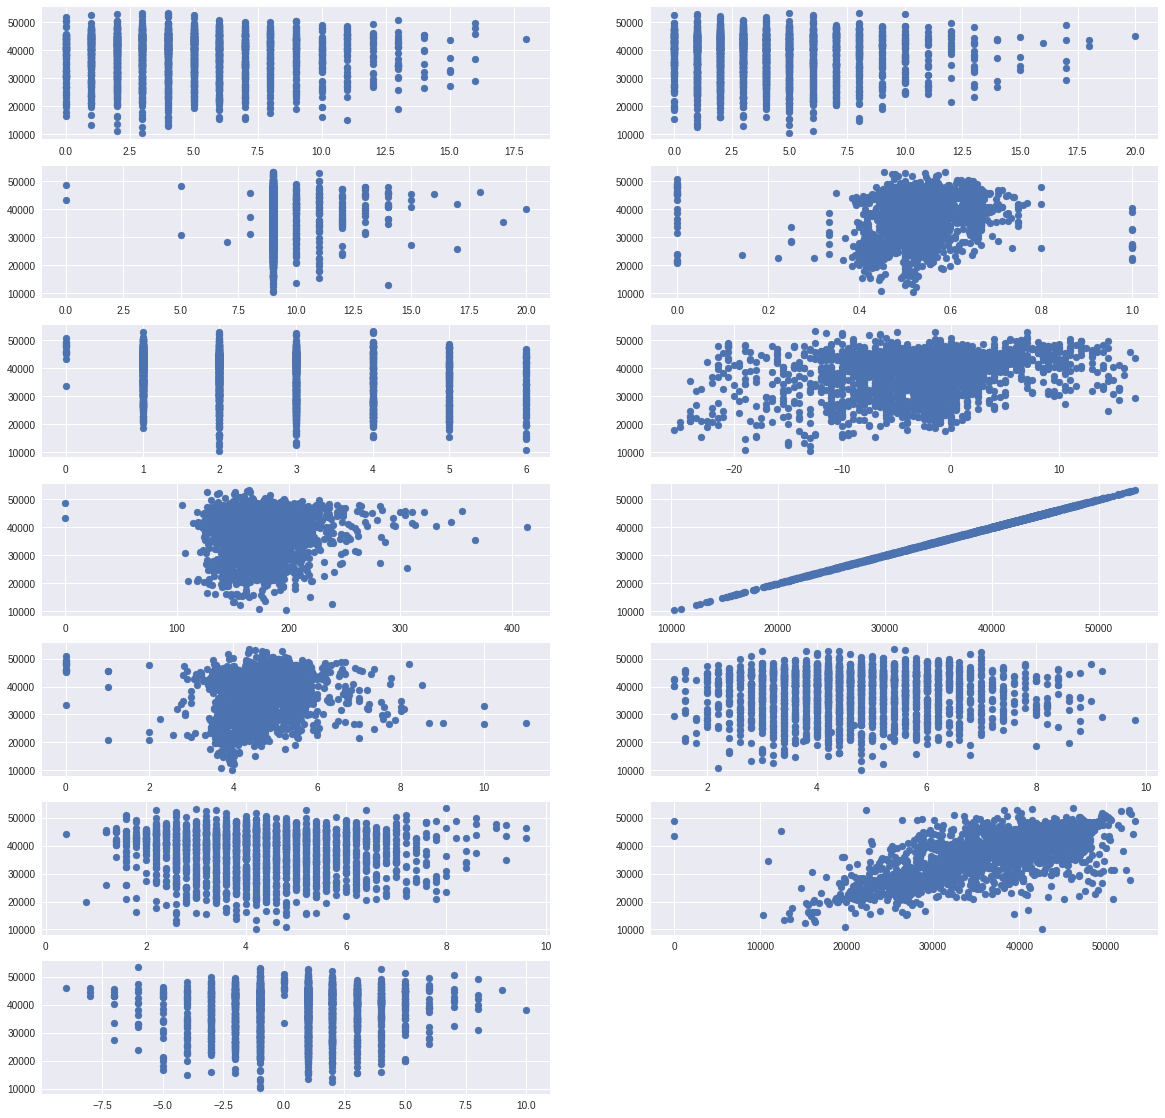

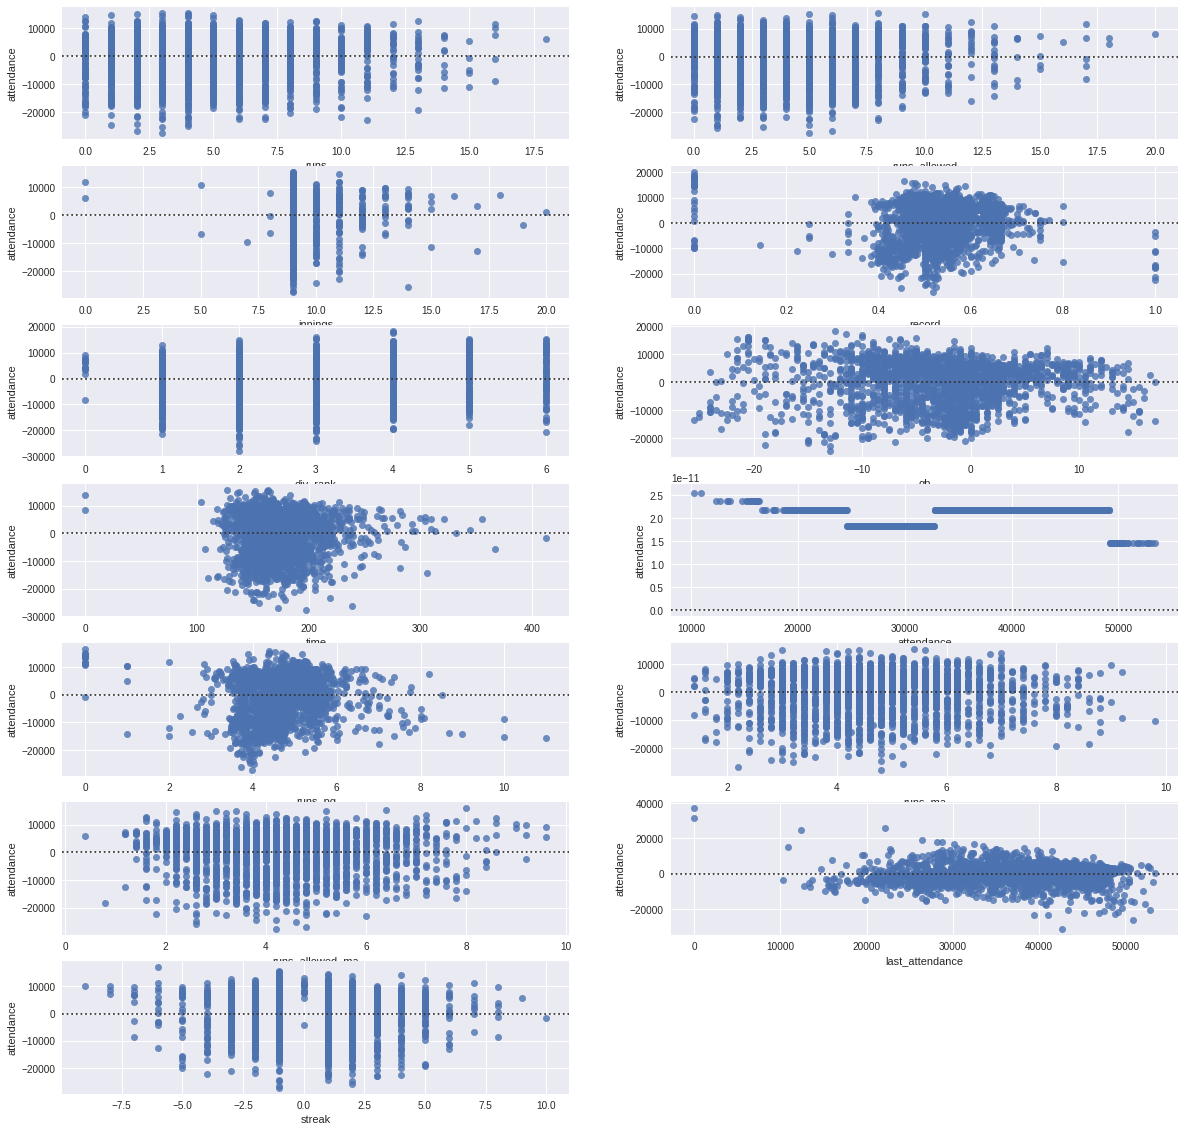

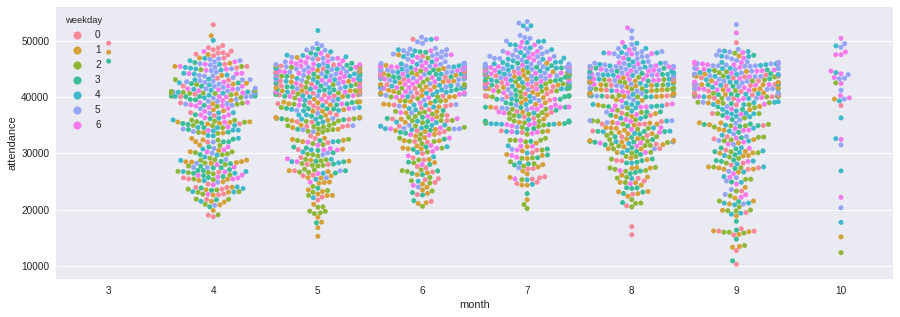

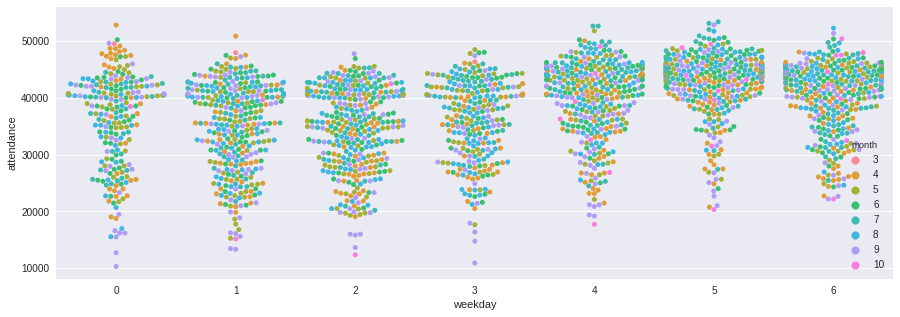

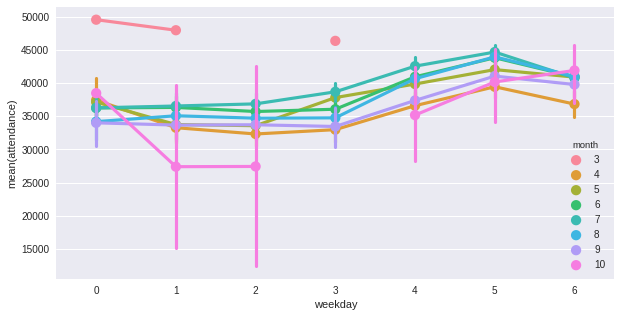

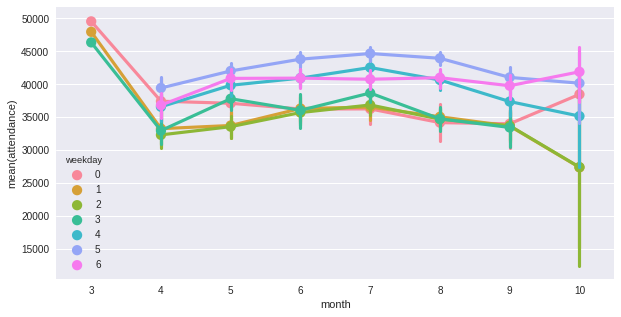

In [12]:
eda(cards_data)

In [13]:
annual_mean_r2(cards_data)

0.43149500326290591

In [14]:
cards_data, feature, target = model_fit_ready(cards_data)

In [15]:
bt = model_fit_score(feature, target)
bt

,train_score,test_score
Bagging_r2,0.925928,0.695600
Decision_tree_r2,1.000000,0.456695
Random_forest_r2,0.928970,0.704010
Gradient_boost_r2,0.767429,0.724590


In [16]:
co_f = feature.copy()
scale = StandardScaler()
feature_sca = pd.DataFrame(scale.fit_transform(co_f),columns=co_f.columns)

In [17]:
scale_fit = model_fit_score(feature_sca, target) 
scale_fit.columns =['scaled_train', 'scaled_test']
scale_fit

,scaled_train,scaled_test
Bagging_r2,0.923122,0.687914
Decision_tree_r2,1.000000,0.462469
Random_forest_r2,0.921070,0.697500
Gradient_boost_r2,0.767429,0.723462


In [18]:
score_table = pd.concat([bt, scale_fit],axis=1)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='random'))))
Feature top 10 ranking:
1. last_attendance (0.752460)
2. SA (0.090609)
3. 1991 (0.030147)
4. opening_day (0.029159)
5. 1995 (0.024461)
6. F (0.023730)
7. 1992 (0.016964)
8. M (0.011982)
9. result_W (0.004959)
10. 1990 (0.002728)


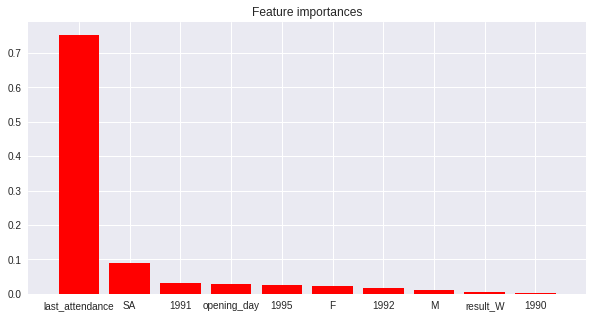

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=18, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.722716)
2. SA (0.059779)
3. runs_pg (0.034367)
4. F (0.034013)
5. gb (0.031818)
6. record (0.022712)
7. time (0.014408)
8. streak (0.008256)
9. runs_ma (0.007572)
10. M (0.007469)


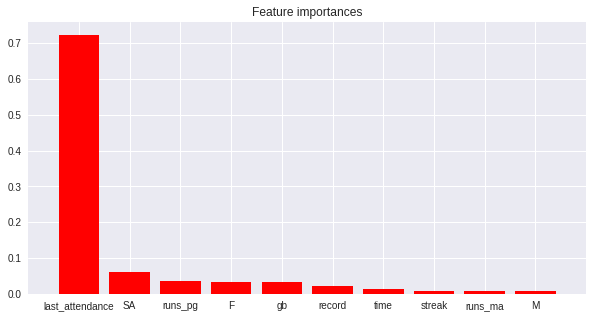

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_sp...s=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.162557)
2. record (0.059770)
3. SA (0.053841)
4. runs_pg (0.048927)
5. gb (0.040370)
6. time (0.038262)
7. F (0.036320)
8. runs_ma (0.029528)
9. runs_allowed_ma (0.028850)
10. streak (0.027515)


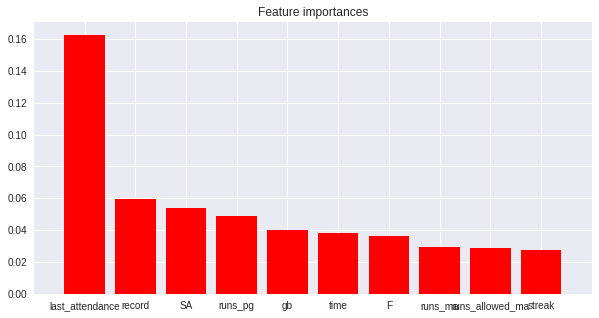

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=24, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.536535)
2. double_header (0.047918)
3. gb (0.045293)
4. opening_day (0.035527)
5. record (0.033662)
6. runs_allowed_ma (0.029129)
7. runs_ma (0.023540)
8. runs_pg (0.022231)
9. streak (0.021427)
10. 1990 (0.020536)


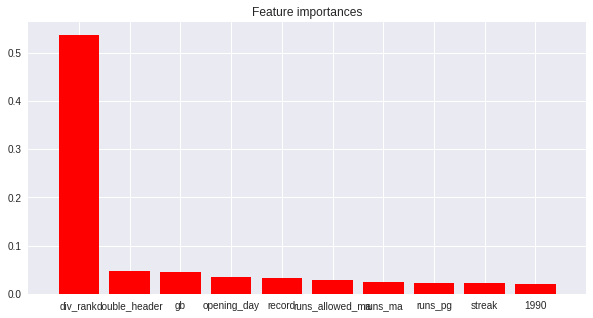

,train_score,test_score,scaled_train,scaled_test,P&O_train_score,P&O_test_score
Bagging_r2,0.925928,0.695600,0.923122,0.687914,0.940534,0.714517
Decision_tree_r2,1.000000,0.456695,1.000000,0.462469,0.579084,0.599689
Random_forest_r2,0.928970,0.704010,0.921070,0.697500,0.713643,0.709125
Gradient_boost_r2,0.767429,0.724590,0.767429,0.723462,0.791370,0.733033


In [19]:
grid_score(feature, target, score_table)

In [20]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature_sca.columns

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [21]:
vif.sort_values('VIF',axis=0,ascending=False)[-16:-1]

,VIF,features
7,4.249420,runs_pg
2,3.955980,gb
0,3.876466,div_rank
4,3.448057,record
58,3.281914,time
57,2.775811,innings
54,2.549804,last_attendance
56,2.505411,runs_allowed
8,2.488747,streak
55,2.310487,runs


In [22]:
vif_feature = feature_sca.drop(['runs_pg','gb'],axis=1)

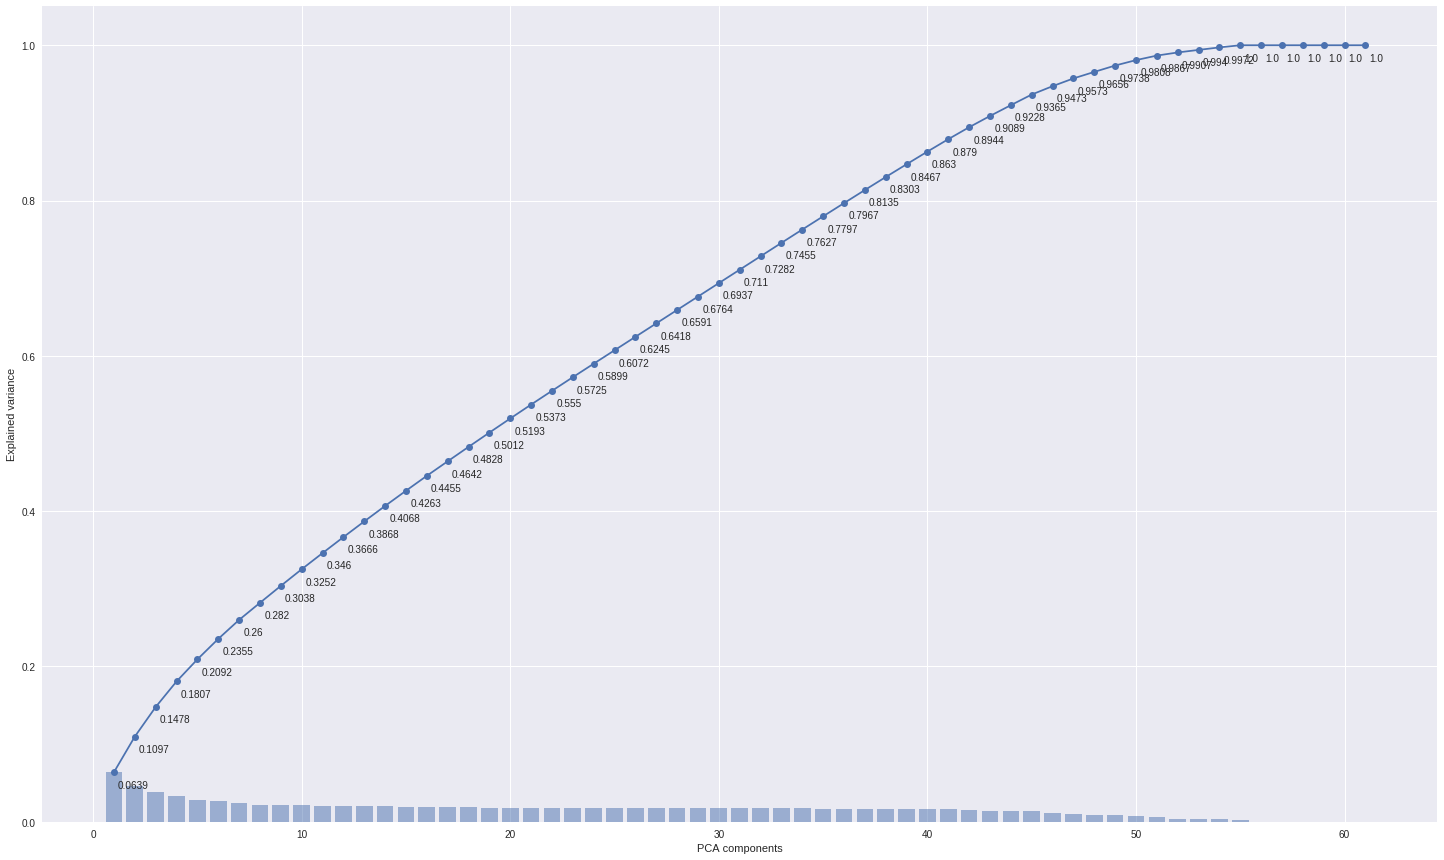

In [23]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(vif_feature))


plt.figure(figsize=(25,15))

X = np.arange(1,62)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [24]:
non_para_model_fit(vif_feature, target, 50)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,1.000000,0.006696
Support Vector Machine,0.694414,0.715327


In [25]:
inter_data, anova_feature, drop_list = interaction_feature(feature, target)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


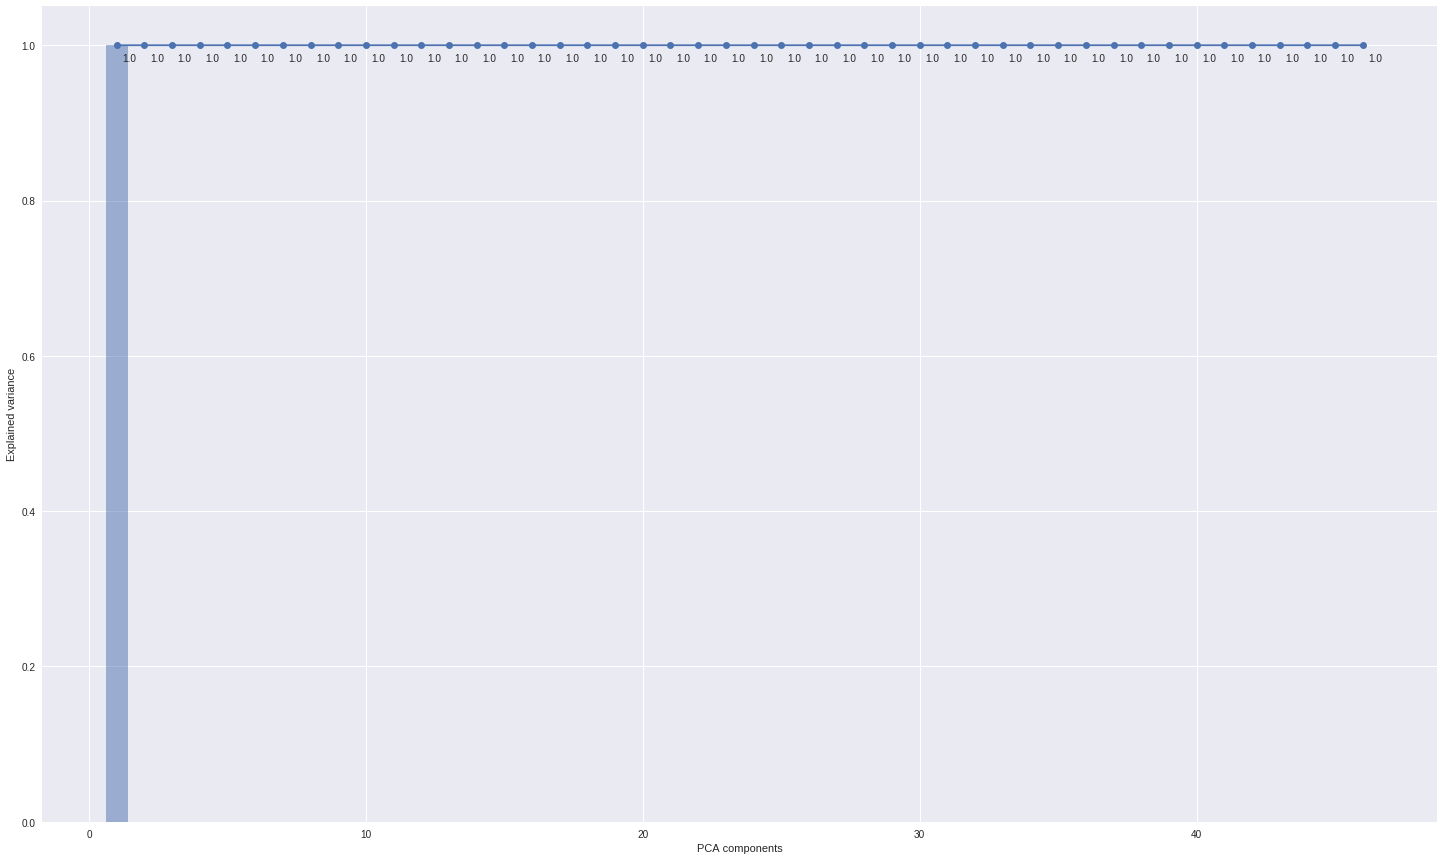

In [27]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(anova_feature))

plt.figure(figsize=(25,15))

X = np.arange(1,47)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [28]:
non_para_model_fit(anova_feature, target, 1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.002232,0.000000
Support Vector Machine,0.681602,0.703701
